# IBM developer Skills network

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

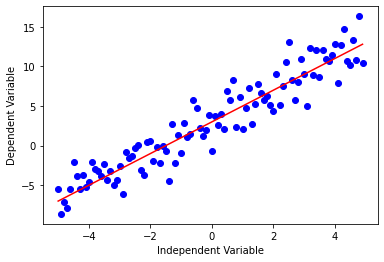

In [6]:
x = np.arange(-5.0, 5.0 , 0.1)
y = 2*(x) + 3  # simple linear equation
y_noise = 2*np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Cubic function

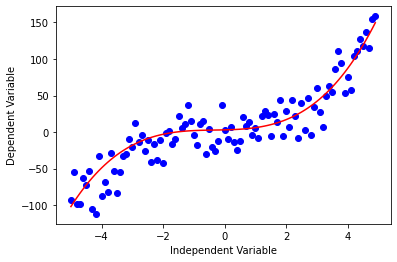

In [7]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20*np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Quadratic function

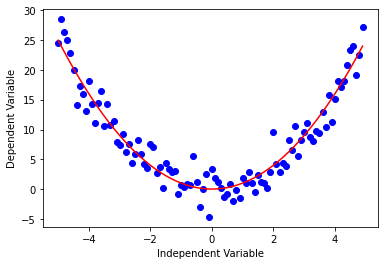

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Exponential

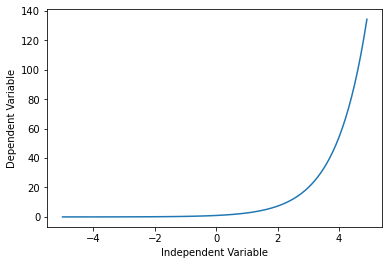

In [9]:
X = np.arange(-5.0, 5.0, 0.1)

Y=np.exp(X)

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## logarithmic

<ipython-input-10-d26e7c4e8f24>:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


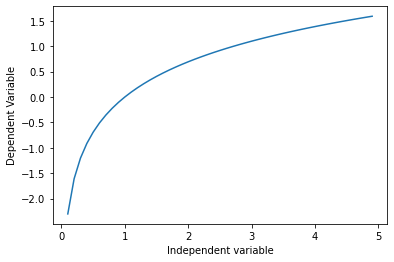

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent variable')
plt.show()

## Sigmoidal / logistic

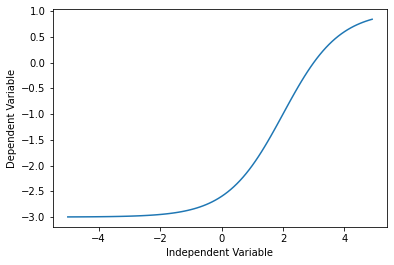

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/sonpn82/Python-machine-learning-project/master/china_gdp.csv')
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


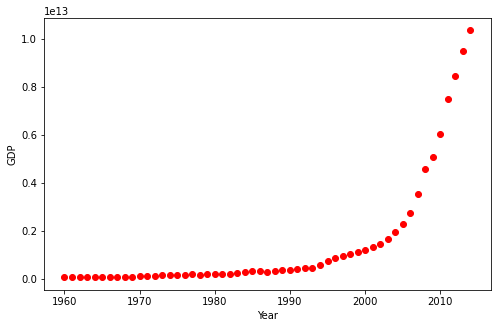

In [13]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Choosing fit model

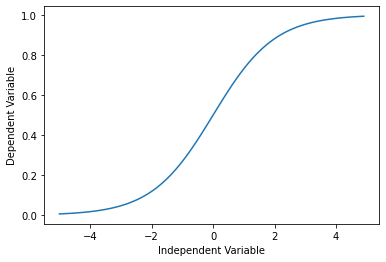

In [14]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))  # Logistic function

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Build the model

In [15]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

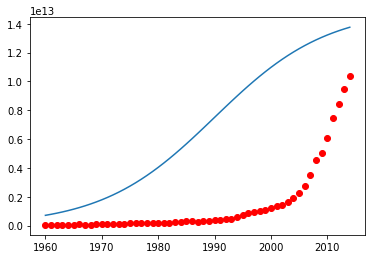

In [16]:
beta1 = 0.1
beta2 = 1990.0

Y_pred = sigmoid(x_data, beta1, beta2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [17]:
# Normalize the data 1st
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

## Find the best parameters using curve_fit

In [18]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


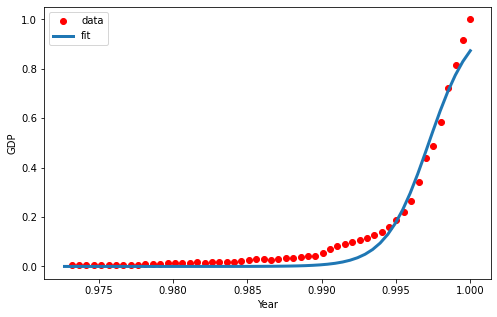

In [19]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Model evaluation

In [20]:
# Split data into train and test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [21]:
# Build the model
pipt, pcov = curve_fit(sigmoid, train_x, train_y)

In [22]:
# Predict using test set
y_hat = sigmoid(test_x, *popt)

In [23]:
# Evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
